In [9]:
# %matplotlib inline
import requests as re #Para html (OBLIGATORIA)
import pandas as pd #Pandas para usar dataframes (OBLIGATORIA)
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar (OBLIGATORIA)
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
from scipy import stats #Para calcular a distribución con shapiro (OBLIGATORIA)

In [47]:
data = pd.read_csv('data.csv')
data

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
996,997,Sibella,Lendrem,slendremro@soundcloud.com,11300.85,NaN,2866.75,2949.20,NaN,0.0848,0.6572
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


In [41]:
''' 
Para inspeccionar un df hay que: 
1. df.describe()
2. df.info()
3. sns.heatmap(df.isnull(), cmap='viridis') 

Shapiro sirve para saber si la distribución de una columna es normal o no: 
Es normal si p > 0,05 y hay que hacerlo para todas las columnas con datos float64
Si es normal, n hace falta escalarlo, por ende, ya podemos trabajar directamente con esas 
'''
col= list(data.columns) #Para poner las columnas en una lista
w, p= stats. shapiro(data['Ingreso']) #Para todas las columnas numericas
data['Ingreso'].quantile(0.95) #Para los out layers 

11311.3235

<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

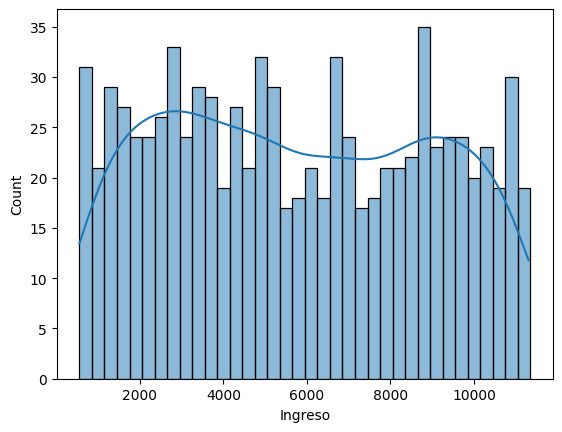

In [46]:
# Anomalía 3ra: Out Layers
Cs = data['Ingreso'].quantile(0.95)
Ci = data['Ingreso'].quantile(0.05)
datos = data[(data['Ingreso'] >= Ci) & (data['Ingreso'] <= Cs)]
sns.histplot(data=datos, x='Ingreso', binwidth=300, kde=True) 